In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### Data preprocessing
# Load the csv files
df_grades = pd.read_csv("./CanvasGrades.csv")
df_class = pd.read_csv("./AIMS_Classlist.csv")

# Filter students in "BSCSIU4" program from df_class
selected_students = df_class[df_class["Programme"] == "BSCSIU4"]

# Extract the EIDs of these students to match with "SIS Login ID" in df_grades
selected_eids = selected_students["EID"]

# Filter df_grades to include only rows where "SIS Login ID" matches the selected EIDs
grades_bscsiu4 = df_grades[df_grades["SIS Login ID"].isin(selected_eids)]
grades_bscsiu4 = grades_bscsiu4.dropna(axis=1)

# Raise an error if there are still any NaN values remaining in filtered_grades_df
if grades_bscsiu4.isna().any().any():
    raise ValueError("There are still NaN values in the filtered_grades_df after dropping columns.")

# Create a new DataFrame from df_grades with the same columns as filtered_grades_df, ensuring no NaN values
grades = df_grades[grades_bscsiu4.columns].dropna()

# Raise an error if there are any NaN values remaining in grades
if grades.isna().any().any():
    raise ValueError("There are still NaN values in the grades after dropping rows.")

# Convert the data type
grades_bscsiu4['Assignments Current Score'] = pd.to_numeric(grades_bscsiu4['Assignments Current Score'], errors='coerce')
grades['Assignments Current Score'] = pd.to_numeric(grades['Assignments Current Score'], errors='coerce')

In [3]:
### Review the mean, median, variance, standard deviation, minimum and maximum score of the data
def print_data(data, section="of the whole class"):
    print(f'The number of students {section} is {data.shape[0]}.\nThe mean of the current score {section} is {data["Assignments Current Score"].mean()}.\nThe standard deviation of the current score {section} is {data["Assignments Current Score"].std()}.\nThe minimum of the current score {section} is {data["Assignments Current Score"].min()}.\nThe maximum of the current score in {section} is {data["Assignments Current Score"].max()}.\nThe median of the current score {section} is {data["Assignments Current Score"].median()}.\n')

print_data(grades)
print_data(grades_bscsiu4, section="in BSCSIU4 Programme")

The number of students of the whole class is 532.
The mean of the current score of the whole class is 74.10853383458647.
The standard deviation of the current score of the whole class is 27.02896973624077.
The minimum of the current score of the whole class is 0.0.
The maximum of the current score in of the whole class is 100.0.
The median of the current score of the whole class is 83.87.

The number of students in BSCSIU4 Programme is 98.
The mean of the current score in BSCSIU4 Programme is 65.91499999999999.
The standard deviation of the current score in BSCSIU4 Programme is 31.361946218603155.
The minimum of the current score in BSCSIU4 Programme is 0.0.
The maximum of the current score in in BSCSIU4 Programme is 100.0.
The median of the current score in BSCSIU4 Programme is 77.42.



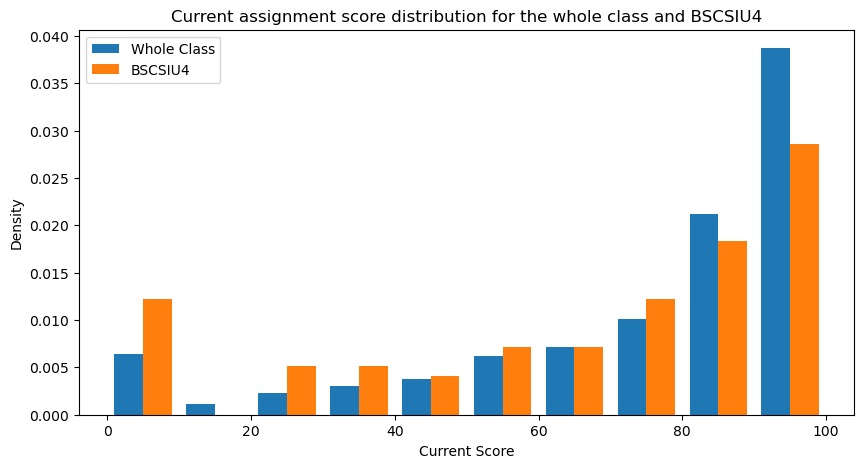

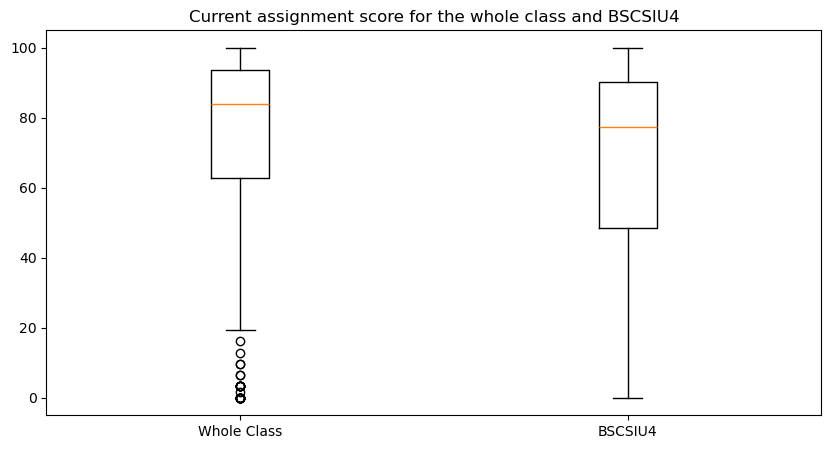

In [4]:
### Data visualization
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the density histograms for df_grade and df_grade_ma on the same subplot
ax.hist([grades['Assignments Current Score'], grades_bscsiu4['Assignments Current Score']], bins=10, density=True, label=['Whole Class', 'BSCSIU4'])
ax.set_xlabel('Current Score')
ax.set_ylabel('Density')
ax.set_title('Current assignment score distribution for the whole class and BSCSIU4')
ax.legend()

# Show the plot
plt.show()

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the boxplots for df_grade and df_grade_ma on the same subplot
ax.boxplot([grades['Assignments Current Score'], grades_bscsiu4['Assignments Current Score']])
ax.set_xticklabels(['Whole Class', 'BSCSIU4'])
ax.set_title('Current assignment score for the whole class and BSCSIU4')

# Show the plot
plt.show()